In [314]:
import numpy as np
from scipy.linalg import eigh, lu_factor, lu_solve
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.special import factorial

In [315]:
# Main Parameters
N = 400 # Number of intervals
XMIN = -6 # Define the spatial domain
XMAX = 6
x = np.linspace(XMIN, XMAX, N+1)
dx = (XMAX - XMIN)/(N)  # Grid spacing
Nint = N-1  # number of interior points

# Potentials
V = 0.5*(x[1:-1]**2)  # Harmonic oscillator potential within the interior points
C_1 = 10
C_2 = 5
V_bump = 0.5*(x[1:-1]**2)+C_1*np.exp((-x[1:-1]**2)*C_2)

In [316]:
# FD coeffficient matrix - 3 point stencil
diag=-2/dx**2*np.ones(Nint)   # array containing elements on diagonal
superdiag=1/dx**2*np.ones(Nint-1)  # array containing elements on superdiagonal
subdiag=1/dx**2*np.ones(Nint-1)   # array containing elements on subdiagonal

A_diag=np.diag(diag,0)    # matrix containing diagnoal 
A_superdiag=np.diag(superdiag,1)   # matrix containing superdiagnoal 
A_subdiag=np.diag(subdiag,-1)    # matrix containing subdiagnoal 

A=A_diag+A_superdiag+A_subdiag   # The complete FD matrix


# FD coefficient matrix - 5 point stencil
diag = -30 / (12 * dx**2) * np.ones(Nint)  # Diagonal
superdiag_1 = 16 / (12 * dx**2) * np.ones(Nint-1)  # First superdiagonal
superdiag_2 = -1 / (12 * dx**2) * np.ones(Nint-2)  # Second superdiagonal
subdiag_1 = 16 / (12 * dx**2) * np.ones(Nint-1)  # First subdiagonal
subdiag_2 = -1 / (12 * dx**2) * np.ones(Nint-2)  # Second subdiagonal

B_diag = np.diag(diag, 0)  # Main diagonal
B_superdiag_1 = np.diag(superdiag_1, 1)  # First superdiagonal
B_superdiag_2 = np.diag(superdiag_2, 2)  # Second superdiagonal
B_subdiag_1 = np.diag(subdiag_1, -1)  # First subdiagonal
B_subdiag_2 = np.diag(subdiag_2, -2)  # Second subdiagonal

B = B_diag + B_superdiag_1 + B_superdiag_2 + B_subdiag_1 + B_subdiag_2

H = -0.5 * B + np.diag(V)  
H_bump = -0.5 * B + np.diag(V_bump)
#print("H", H)
print("H_bump", H_bump)

H_bump [[1406.70933889 -740.74074074   46.2962963  ...    0.
     0.            0.        ]
 [-740.74074074 1406.53068889 -740.74074074 ...    0.
     0.            0.        ]
 [  46.2962963  -740.74074074 1406.35293889 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 1406.35293889
  -740.74074074   46.2962963 ]
 [   0.            0.            0.         ... -740.74074074
  1406.53068889 -740.74074074]
 [   0.            0.            0.         ...   46.2962963
  -740.74074074 1406.70933889]]


In [317]:
# Solve the eigenvalue problem with standard routine
eigenvalues, eigenvectors = eigh(H)
eigenvalues_bump, eigenvectors_bump = eigh(H_bump)
print("Eigenvalues:", eigenvalues)
print("Eigenvalues with bump:", eigenvalues_bump)

for i in range(eigenvectors.shape[1]):
    idx_max = np.argmax(np.abs(eigenvectors[:, i]))
    if eigenvectors[idx_max, i] < 0:
        eigenvectors[:, i] *= -1

for i in range(eigenvectors_bump.shape[1]):
    idx_max = np.argmax(np.abs(eigenvectors_bump[:, i]))
    if eigenvectors_bump[idx_max, i] < 0:
        eigenvectors_bump[:, i] *= -1



# ----- Do some checks ------------- :
print("The matrix is real: ", np.all(np.isreal(H)))
print("The matrix is symmetric: ", np.allclose(H, H.T))  
print("The matrix with bump is real: ", np.all(np.isreal(H_bump)))
print("The matrix with bump is symmetric: ", np.allclose(H_bump, H_bump.T)) 
# Eigenvectors should be orthogonal:
v1 = eigenvectors[:, 0]  # First eigenvector
v2 = eigenvectors[:, 1]  # Second eigenvector
dot_product = np.dot(v1, v2)
print("Dot product of first two eigenvectors:", dot_product)
# Same for the eigenvector matrix where each column is an eigenvector:
orthogonality_check = np.dot(eigenvectors.T, eigenvectors)
print("Orthogonality check:", orthogonality_check)


Eigenvalues: [4.99999992e-01 1.49999994e+00 2.49999979e+00 3.49999947e+00
 4.49999891e+00 5.49999807e+00 6.49999698e+00 7.49999644e+00
 8.50000178e+00 9.50004116e+00 1.05002391e+01 1.15010573e+01
 1.25039205e+01 1.35124380e+01 1.45339669e+01 1.55803440e+01
 1.66663936e+01 1.78065077e+01 1.90115633e+01 2.02879808e+01
 2.16386224e+01 2.30642191e+01 2.45644830e+01 2.61387475e+01
 2.77862733e+01 2.95063709e+01 3.12984403e+01 3.31619734e+01
 3.50965454e+01 3.71018017e+01 3.91774455e+01 4.13232280e+01
 4.35389384e+01 4.58243978e+01 4.81794528e+01 5.06039711e+01
 5.30978377e+01 5.56609517e+01 5.82932242e+01 6.09945758e+01
 6.37649354e+01 6.66042385e+01 6.95124262e+01 7.24894442e+01
 7.55352421e+01 7.86497724e+01 8.18329902e+01 8.50848527e+01
 8.84053187e+01 9.17943481e+01 9.52519017e+01 9.87779409e+01
 1.02372427e+02 1.06035323e+02 1.09766590e+02 1.13566188e+02
 1.17434080e+02 1.21370226e+02 1.25374584e+02 1.29447115e+02
 1.33587774e+02 1.37796520e+02 1.42073306e+02 1.46418088e+02
 1.50830817

Approximate smallest eigenvalue: 2.5023425856095156


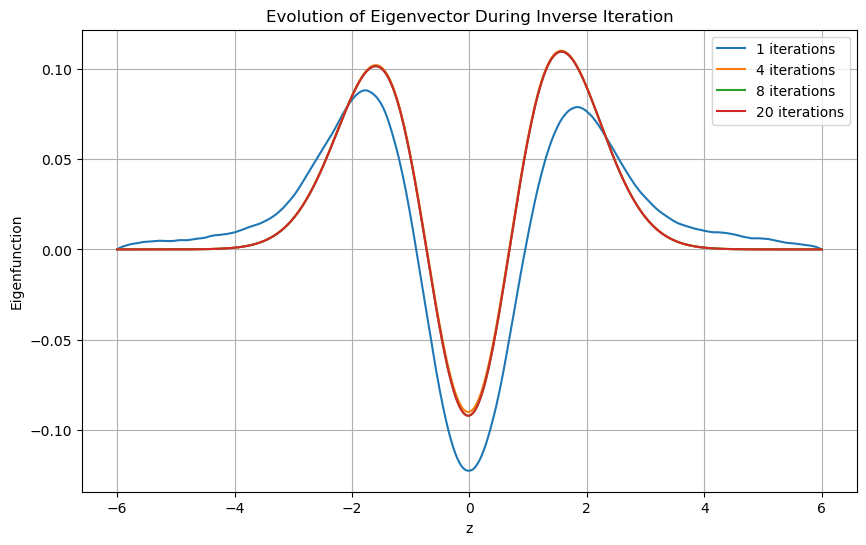

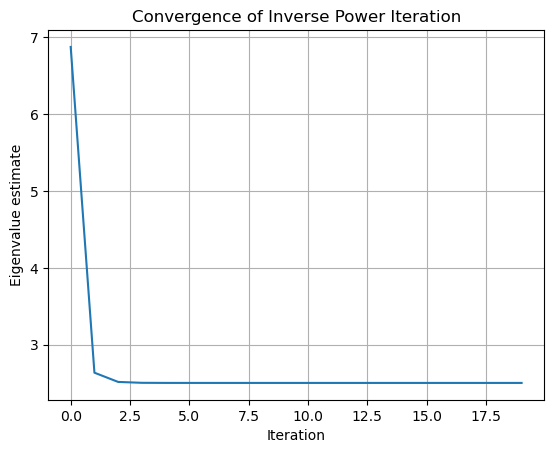

In [318]:
# Inverse Power Iteration
xi = 2.0 # Choose a shift value
H_shifted = H - xi * np.eye(Nint)
# Initial random vector
y = np.random.rand(Nint)
y = y / np.linalg.norm(y)  # normalize

# LU Decomposition
lu, piv = lu_factor(H_shifted)

n_iterations = 20
eigenvalue_estimates = []
eigenvectors_snapshots = {}

for i in range(n_iterations):
    y_old = y.copy()

    # Solve (H - xi*I) y_new = y_old
    y_new = lu_solve((lu, piv), y_old)

    
    numerator = np.dot(y_old, y_new)
    denominator = np.dot(y_old, y_old)
    inv_lambda_shifted = numerator / denominator
    lambda_est = xi + 1/inv_lambda_shifted
    eigenvalue_estimates.append(lambda_est)

    # Normalize 
    y = y_new / np.linalg.norm(y_new)

    
    if i+1 in [1, 4, 8, 20]: 
        eigenvectors_snapshots[i+1] = y.copy()

    if np.linalg.norm(y_new - y_old) < 1e-10:
        break



eigenvector_approx = y

# Print eigenvalue
print("Approximate smallest eigenvalue:", lambda_est)

plt.figure(figsize=(10,6))

for iteration, eigenvector_approx in eigenvectors_snapshots.items():
    
    eigenvector_full = np.zeros_like(x)
    eigenvector_full[1:-1] = eigenvector_approx

    plt.plot(x, eigenvector_full, label=f"{iteration} iterations")


plt.xlabel("z")
plt.ylabel("Eigenfunction")
plt.title("Evolution of Eigenvector During Inverse Iteration")
plt.legend()
plt.grid()
plt.show()

# Plot convergence
plt.plot(eigenvalue_estimates)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")
plt.title("Convergence of Inverse Power Iteration")
plt.grid()

plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_87844/443440935.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Potential $V(z)$ [$\hbar\omega$]")


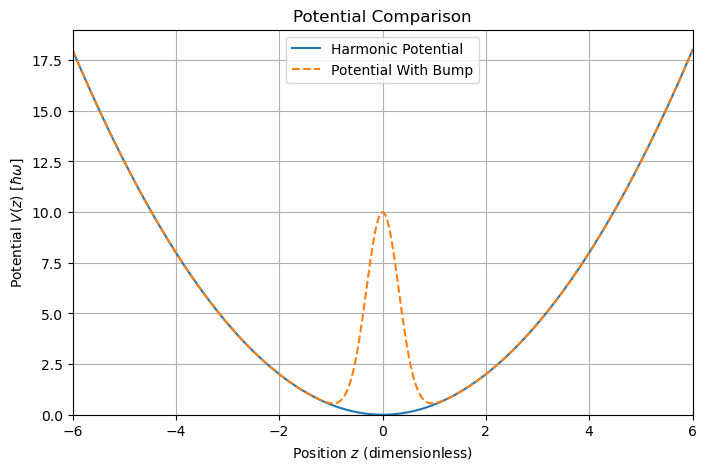

In [319]:
# Plotting potential
V=0.5*(x**2)
V_bump = 0.5*(x**2)+10*np.exp(-(x**2)*5)
plt.figure(figsize=(8, 5))
plt.plot(x, V, label="Harmonic Potential")
plt.plot(x, V_bump, label='Potential With Bump', linestyle='--')
plt.legend()
plt.xlabel("Position $z$ (dimensionless)")
plt.ylabel("Potential $V(z)$ [$\hbar\omega$]")
plt.title("Potential Comparison")
plt.xlim(XMIN, XMAX) 
plt.ylim(0, max(V) + 1)  
plt.legend()
plt.grid()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_87844/2851050369.py:6: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel(f"Wavefunction $\Psi(z)$ (dimensionless)")


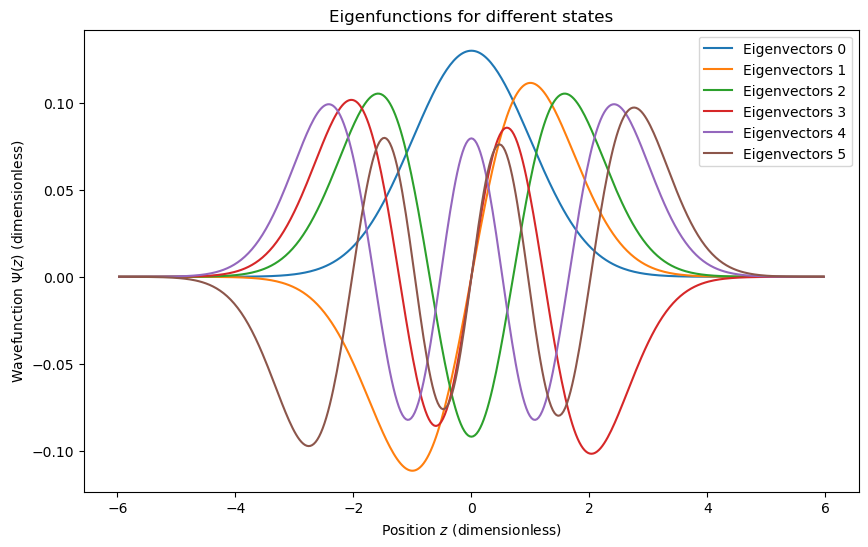

In [ ]:
# Plot eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(6):  
    plt.plot(x[1:-1], eigenvectors[:, i], label=f"Eigenvectors {i}")
plt.xlabel("Position $z$ (dimensionless)")
plt.ylabel(f"Wavefunction $\Psi(z)$ (dimensionless)")
plt.title(f"Eigenfunctions for different states")
plt.legend()
plt.show()


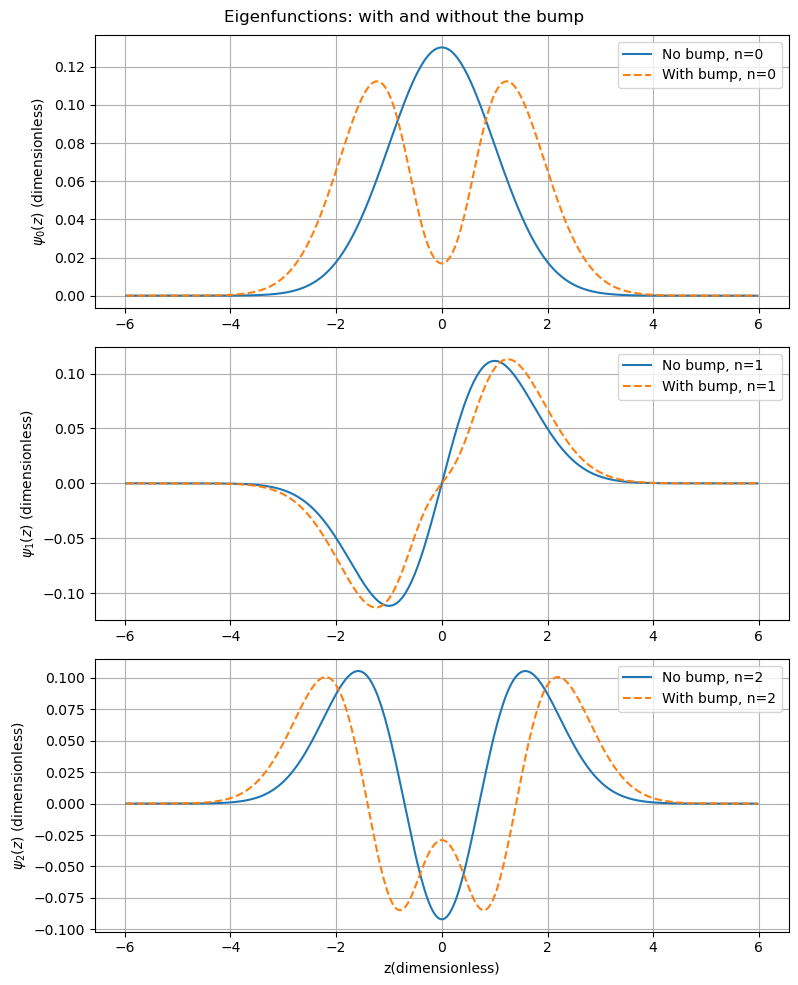

In [321]:
# Eigenfunctions WITH/WITHOUT bump
n_plot = 3

fig, axs = plt.subplots(n_plot, 1, figsize=(8, 10))
for n in range(n_plot):
    axs[n].plot(x[1:-1], eigenvectors[:, n], label=f'No bump, n={n}')
    axs[n].plot(x[1:-1], eigenvectors_bump[:, n], '--', label=f'With bump, n={n}')
    axs[n].set_ylabel(f'$ψ_{n}(z)$ (dimensionless)')
    axs[n].legend()
    axs[n].grid()

axs[-1].set_xlabel('z(dimensionless)')
plt.suptitle('Eigenfunctions: with and without the bump')
plt.tight_layout()
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_87844/3524946409.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Energy $E$ [$\hbar\omega$]')


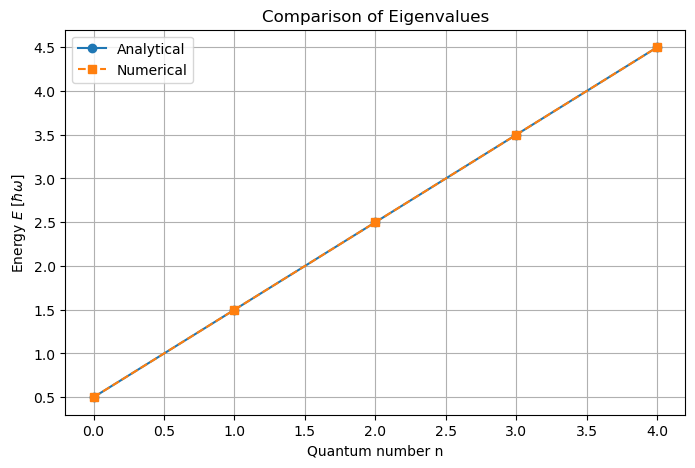

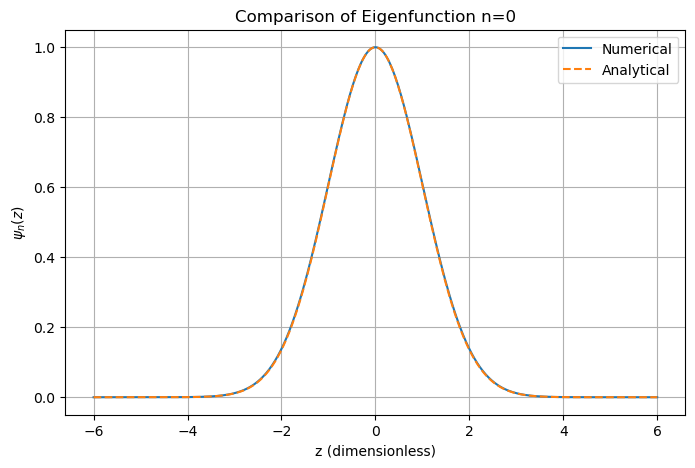

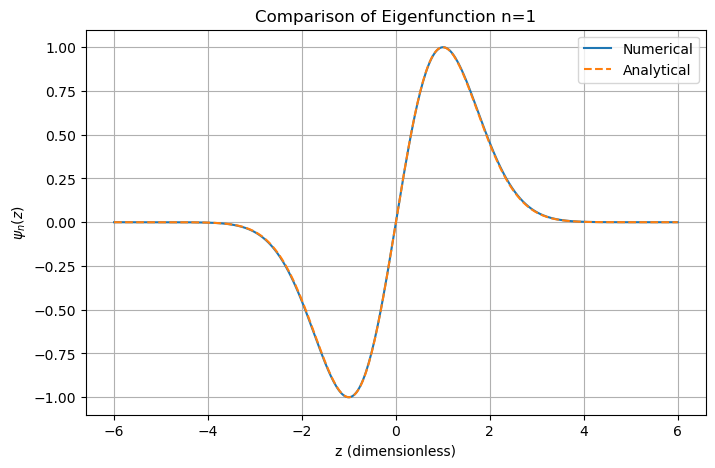

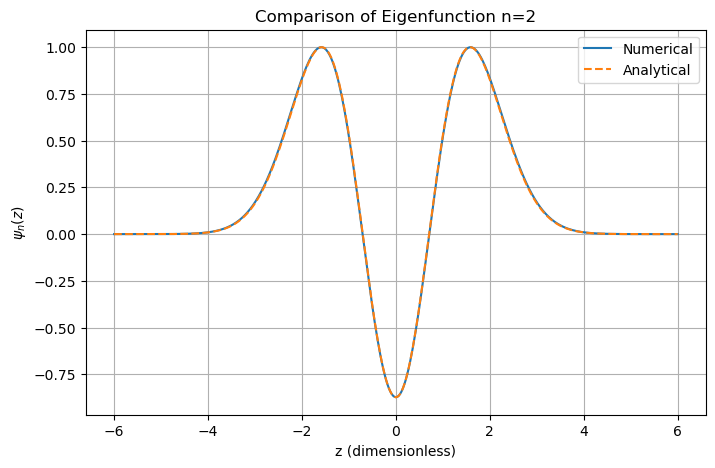

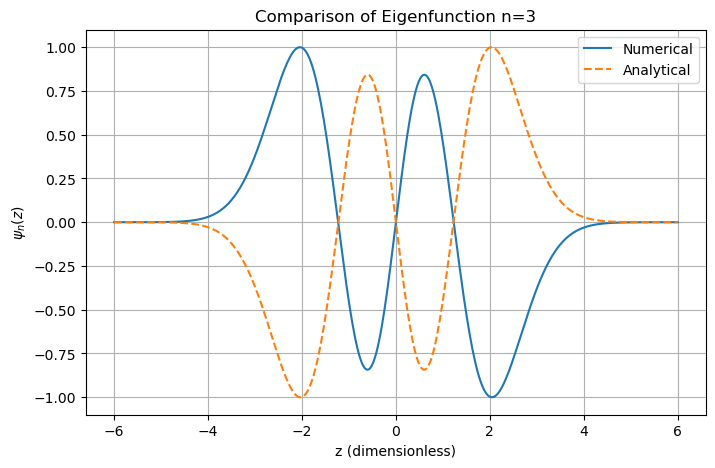

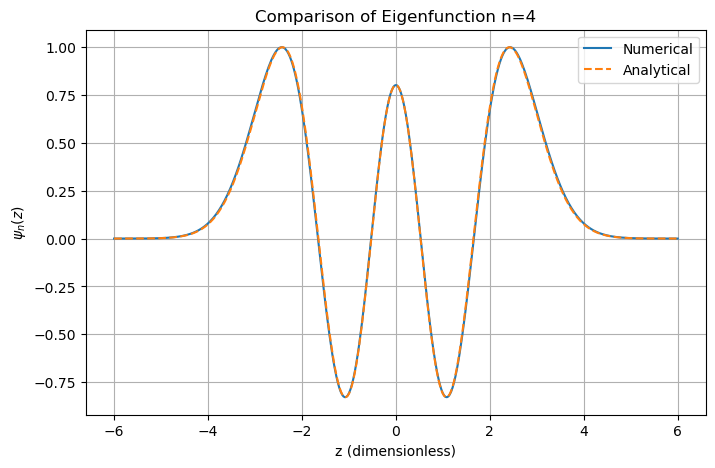

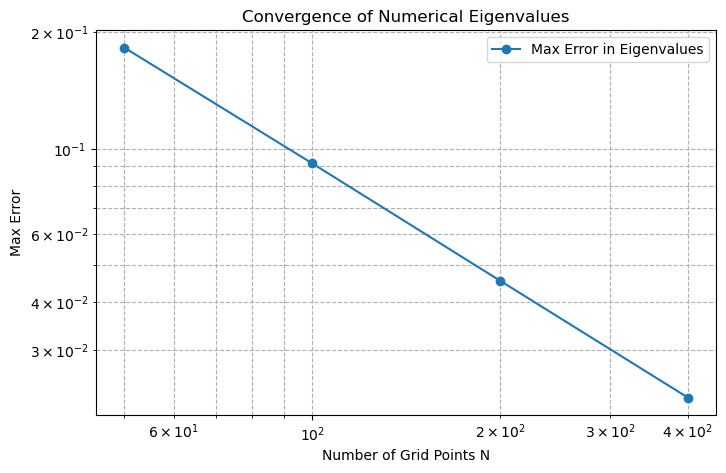

In [322]:

# Analytical eigenvalues 
n_levels = 5  
analytical_eigenvalues = np.array([n + 0.5 for n in range(n_levels)])


numerical_eigenvalues = np.sort(eigenvalues)

# Compare eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(n_levels), analytical_eigenvalues, 'o-', label='Analytical')
plt.plot(range(n_levels), numerical_eigenvalues[:n_levels], 's--', label='Numerical')
plt.xlabel('Quantum number n')
plt.ylabel('Energy $E$ [$\hbar\omega$]')
plt.title('Comparison of Eigenvalues')
plt.legend()
plt.grid()
plt.show()

# Analytical eigenfunctions
def analytical_eigenfunction(n, x):
    Hn = hermite(n)
    norm = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return norm * np.exp(-x**2 / 2) * Hn(x)

# Compare eigenfunctions
for n in range(n_levels):
    plt.figure(figsize=(8, 5))
    
    numerical_eigenvector = eigenvectors[:, n]
    numerical_eigenvector /= np.max(np.abs(numerical_eigenvector))

    x_interior = np.linspace(XMIN, XMAX, len(numerical_eigenvector))

    analytical = analytical_eigenfunction(n, x_interior)
    analytical /= np.max(np.abs(analytical))

    plt.plot(x_interior, numerical_eigenvector, label='Numerical')
    plt.plot(x_interior, analytical, '--', label='Analytical')
    plt.xlabel('z (dimensionless)')
    plt.ylabel(r'$\psi_n(z)$')
    plt.title(f'Comparison of Eigenfunction n={n}')
    plt.legend()
    plt.grid()
    plt.show()

N_values = [50, 100, 200, 400]  
errors = []  
for N in N_values:
    dx = (XMAX - XMIN) / N
    Nint = N - 1  
    V_interior = 0.5 * (np.linspace(XMIN, XMAX, Nint)**2)  

    # FD coefficient matrix - 5 point stencil
    diag = -30 / (12 * dx**2) * np.ones(Nint)  # Diagonal
    superdiag_1 = 16 / (12 * dx**2) * np.ones(Nint - 1)  # First superdiagonal
    superdiag_2 = -1 / (12 * dx**2) * np.ones(Nint - 2)  # Second superdiagonal
    subdiag_1 = 16 / (12 * dx**2) * np.ones(Nint - 1)  # First subdiagonal
    subdiag_2 = -1 / (12 * dx**2) * np.ones(Nint - 2)  # Second subdiagonal

    B_diag = np.diag(diag, 0)  # Main diagonal
    B_superdiag_1 = np.diag(superdiag_1, 1)  # First superdiagonal
    B_superdiag_2 = np.diag(superdiag_2, 2)  # Second superdiagonal
    B_subdiag_1 = np.diag(subdiag_1, -1)  # First subdiagonal
    B_subdiag_2 = np.diag(subdiag_2, -2)  # Second subdiagonal

    B = B_diag + B_superdiag_1 + B_superdiag_2 + B_subdiag_1 + B_subdiag_2

    # Hamiltonian matrix
    H = -0.5 * B + np.diag(V_interior)
    
    eigvals, eigvecs = eigh(H)
    
    eigvals = np.sort(eigvals)
    
    analytical = np.array([n + 0.5 for n in range(len(eigvals))])
    
    n_compare = 5
    error = np.max(np.abs(eigvals[:n_compare] - analytical[:n_compare]))
    errors.append(error)

# Plot the convergence
plt.figure(figsize=(8, 5))
plt.loglog(N_values, errors, 'o-', label='Max Error in Eigenvalues')
plt.xlabel('Number of Grid Points N')
plt.ylabel('Max Error')
plt.title('Convergence of Numerical Eigenvalues')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

